## Exploratory Data Analysis

In [11]:
# importing libraries
import os
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from os import system
from sklearn.linear_model import LinearRegression #importing logistic regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble  import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor 
os.getcwd()

'C:\\Users\\shubh\\Downloads\\AIML'

#### Loading train data

In [10]:
freq_train = pd.read_csv('Train Data Zip/frequency_domain_features_train.csv')
time_train = pd.read_csv('Train Data Zip/time_domain_features_train.csv')
nl_train = pd.read_csv('Train Data Zip/heart_rate_non_linear_features_train.csv')

#### Loading test data

In [12]:
freq_test = pd.read_csv('Test Zip/frequency_domain_features_test.csv')
time_test = pd.read_csv('Test Zip/time_domain_features_test.csv')
nl_test = pd.read_csv('Test Zip/heart_rate_non_linear_features_test.csv')

#### Merging train data

In [13]:
freq_time_train = pd.merge(freq_train, time_train, on='uuid')
train_df=pd.merge(freq_time_train, nl_train, on='uuid')
s1=train_df.shape
train_df.drop_duplicates(inplace=True)
s2=train_df.shape
print('Null values in training dataframe:', train_df.isnull().values.any())
if s1[0]-s2[0]>1:
    print('Duplicates have been dropped')
else:
    print('No duplicates found')
train_df.head()

Null values in training dataframe: False
No duplicates found


,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,0.007969,2.143342,-0.856554,0.335218,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,0.004769,2.930855,-0.408190,-0.155286,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,0.008716,2.127053,0.351789,-0.656813,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,0.008660,2.050988,-0.504947,-0.386138,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,0.013055,1.816544,-0.548408,-0.154252,13.590641,87.718281,2.221121,1.249612,2,no stress


In [14]:
print('Are there any nan values?: ',np.any(np.isnan(train_df.iloc[:,1:-1])))
print('Are all values finite?: ', np.all(np.isfinite(train_df.iloc[:,1:-1])))

Are there any nan values?:  False
Are all values finite?:  True


#### Merging test data

In [16]:
freq_time_test = pd.merge(freq_test, time_test, on='uuid')
test_df=pd.merge(freq_time_test, nl_test, on='uuid')
s1=test_df.shape
test_df.drop_duplicates(inplace=True)
s2=test_df.shape
print('Null values in testing dataframe:', test_df.isnull().values.any())
if s1[0]-s2[0]>1:
    print('Duplicates have been dropped')
else:
    print('No duplicates found')
test_df.head()

Null values in testing dataframe: False
No duplicates found


,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId,condition
0,62b75db5-bc40-4c8f-9166-daf0efcab4c2,1868.532278,76.511189,570.643114,23.366245,99.478197,2.993254,0.122565,0.521803,2442.168645,...,0.004578,2.825038,-0.680262,-0.233075,8.347898,115.862444,2.209659,1.100715,2,time pressure
1,a99549ad-3eb6-4413-bc90-9053e7f7e684,568.742845,26.301350,1553.971621,71.862973,97.509212,39.694850,1.835677,2.490788,2162.409316,...,0.013921,1.806517,-0.034454,-0.051689,14.542096,77.118903,2.186132,1.290615,2,no stress
2,cb573d3a-c767-4556-b32e-ad8c08ded214,2101.871207,75.836461,655.175895,23.639042,97.829386,14.536877,0.524497,2.170614,2771.583978,...,0.008149,1.906180,-0.206953,-0.589940,9.799336,125.044377,2.051571,1.226663,2,no stress
3,47a0c6de-2aef-4ac3-997d-252fa6fd07f1,5757.544433,90.562305,592.913021,9.326123,98.817806,7.093235,0.111572,1.182194,6357.550689,...,0.007587,2.225116,-0.820407,0.487198,11.639185,302.029812,2.080910,1.085143,2,time pressure
4,de3fd54f-c74e-4fe8-bf2a-7a127f68b312,964.696325,70.256575,374.939530,27.305968,91.805057,33.468834,2.437457,8.194943,1373.104689,...,0.007811,1.725606,1.738453,-0.005082,7.266567,72.579248,2.068728,1.252547,2,interruption


In [248]:
train_df['uuid'].equals(test_df['uuid'])

False

#### Reviewing the training dataframe

In [249]:
train_df.describe()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,SD1,SD2,sampen,higuci,datasetId
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,...,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.0
mean,2199.580170,64.289242,946.530252,34.095182,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,...,0.009701,0.009701,2.006817,0.523235,0.041628,10.593708,154.178997,2.062471,1.182292,2.0
std,1815.773422,16.774844,574.171780,16.040290,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,...,0.003897,0.003897,0.375845,1.790348,0.699522,2.914795,109.170222,0.206999,0.062192,0.0
min,159.480176,19.031219,90.048557,2.165119,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,...,0.003220,0.003220,1.169342,-1.894820,-2.136278,3.911344,38.307745,0.434576,1.033984,2.0
25%,1001.189280,52.909877,545.449386,22.305936,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,...,0.006984,0.006984,1.749801,-0.352783,-0.359291,8.368340,90.326864,2.032977,1.139929,2.0
50%,1667.903111,66.350237,782.716291,32.047025,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,...,0.008691,0.008691,1.934416,0.040736,-0.060966,10.196621,116.221063,2.134214,1.174293,2.0
75%,2654.121052,76.825032,1201.432256,44.647115,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,...,0.011460,0.011460,2.221232,0.722833,0.282417,12.679005,166.764850,2.181929,1.223621,2.0
max,12617.977191,97.738848,3291.548112,77.928847,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,...,0.026955,0.026955,3.724134,64.088107,6.777800,18.836107,796.852945,2.234841,1.361219,2.0


#### The maximum of multiple columns are more than three standard deviation away from the mean, which implies outliers need to be removed before performing correlations.

### Scaling training and testing data

In [17]:
# Dropping categorical and unrequired columns
train_df_clean = train_df.drop(columns=['uuid','datasetId','condition'])
test_df_clean = test_df.drop(columns=['uuid','datasetId','condition'])

In [22]:
# Function for scaling the data
def scaler(data, scale):
    if scale=='StandardScaler':
        train_df_sc=pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns, index=data.index)
    elif scale=='MaxAbsScaler':
        train_df_sc=pd.DataFrame(MaxAbsScaler().fit_transform(data),columns=data.columns, index=data.index)
    elif scale=='RobustScaler':
        train_df_sc=pd.DataFrame(RobustScaler().fit_transform(data),columns=data.columns, index=data.index)
    elif scale=='MinMaxScaler':
        train_df_sc=pd.DataFrame(MinMaxScaler().fit_transform(data),columns=data.columns, index=data.index)
    elif scale=='Normalizer':
        train_df_sc=pd.DataFrame(Normalizer().fit_transform(data),columns=data.columns, index=data.index)
    elif scale=='QuantileTransformer':
        train_df_sc=pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(data),columns=data.columns, index=data.index)
    elif scale=='PowerTransformer1':
        train_df_sc=pd.DataFrame(PowerTransformer(method='yeo-johnson').fit_transform(data),columns=data.columns, index=data.index)
    return train_df_sc

scales=['StandardScaler', 'MaxAbsScaler', 'RobustScaler', 'MinMaxScaler', 'Normalizer', 'QuantileTransformer', 'PowerTransformer1', 'PowerTransformer2']
train_df_scale=scaler(train_df_clean, scales[6]).iloc[:,:]
test_df_scale=scaler(train_df_clean, scales[6]).iloc[:,:]


In [23]:
print('Are there any nan values after scaling?: ',np.any(np.isnan(train_df_scale)))
print('Are all values finite after scaling?: ', np.all(np.isfinite(train_df_scale)))

Are there any nan values after scaling?:  False
Are all values finite after scaling?:  True


<AxesSubplot:>

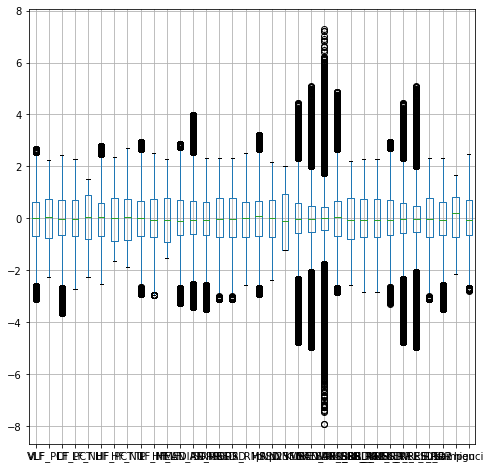

In [24]:
train_df_scale.boxplot(figsize=(8,8))

1. PowerTransform seems to make the data more gaussian like with the spread of outliers minimized quite strongly.

### Replacing outliers of training and testing data

In [25]:
def replace_out(df_scale):
    q1 = df_scale.quantile(0.25)
    q3 = df_scale.quantile(0.75)
    IQR = q3 - q1
    df_sc2=df_scale.iloc[:,:] # The new dataframe will be one with minimum outliers

    for i,j in zip(np.where(df_scale > q3+1.5*IQR)[0], np.where(df_scale > q3+1.5*IQR)[1]):
        w = q3 + 1.5*IQR
        df_sc2.iloc[i, j] = w[j]

    for i,j in zip(np.where(df_scale < q1-1.5*IQR)[0], np.where(df_scale < q1-1.5*IQR)[1]):
        w2 = q1 - 1.5*IQR
        df_sc2.iloc[i, j] = w2[j]
    return df_sc2

train_df_sc2 = replace_out(train_df_scale)
test_df_sc2 = replace_out(test_df_scale)

<AxesSubplot:>

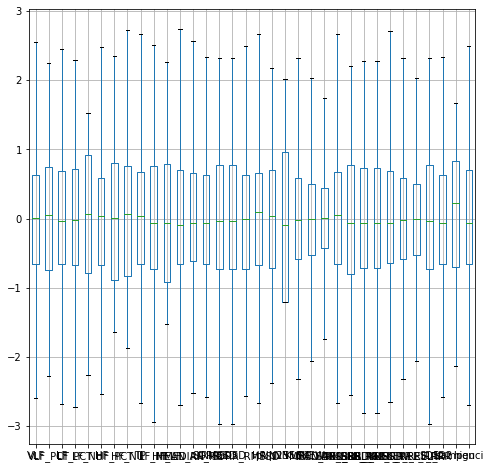

In [27]:
test_df_sc2.boxplot(figsize=(8,8))

#### Outliers have been minimized with replacement of data

### Bi-variate analysis

                        VLF   VLF_PCT        LF    LF_PCT     LF_NU        HF  \
VLF                1.000000  0.742104  0.247710 -0.726807  0.290235 -0.189725   
VLF_PCT            0.742104  1.000000 -0.451096 -0.993842  0.073916 -0.329245   
LF                 0.247710 -0.451096  1.000000  0.480432  0.342218  0.170665   
LF_PCT            -0.726807 -0.993842  0.480432  1.000000  0.008166  0.263236   
LF_NU              0.290235  0.073916  0.342218  0.008166  1.000000 -0.830725   
HF                -0.189725 -0.329245  0.170665  0.263236 -0.830725  1.000000   
HF_PCT            -0.602652 -0.503005 -0.123043  0.432353 -0.881405  0.859822   
HF_NU             -0.302756 -0.088850 -0.335749  0.008333 -0.992981  0.856833   
TP                 0.930302  0.464455  0.538067 -0.455139  0.312549 -0.053824   
LF_HF              0.304772  0.092239  0.333787 -0.011992  0.985000 -0.863441   
HF_LF             -0.290224 -0.073904 -0.342222 -0.008179 -1.000000  0.830702   
MEAN_RR            0.502255 

<AxesSubplot:>

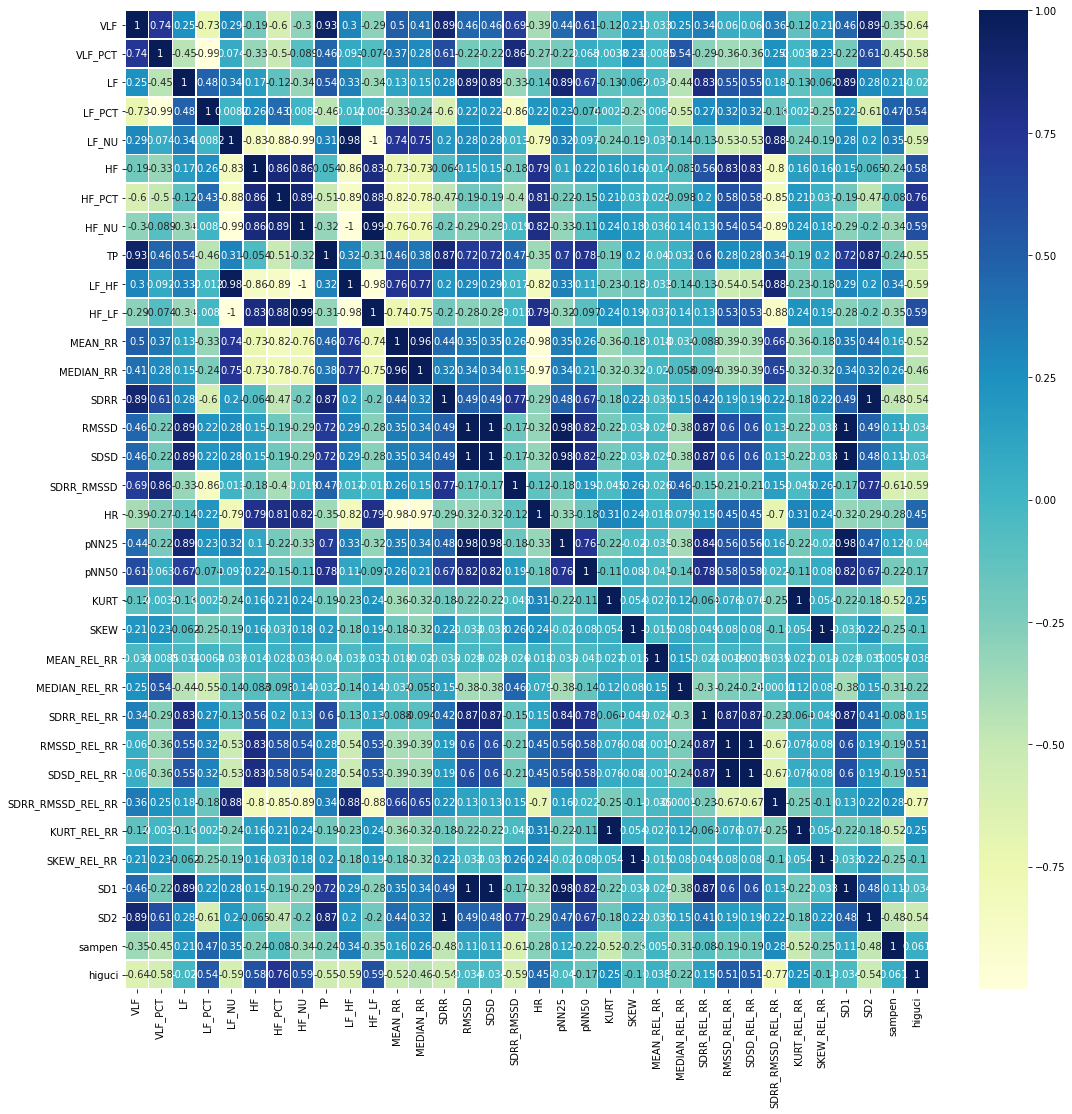

In [28]:
corr = train_df_sc2.iloc[:,:].corr() # Correlation matrix
print(corr)
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, annot=True, linewidths=.5, center=0, cbar=True, cmap="YlGnBu")

In [29]:
# Dropping highly correlated data
corr_abs = train_df_sc2.iloc[:,:].corr() # Correlation matrix
uptrai= corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(np.bool))
to_drop = [column for column in uptrai.columns if any(uptrai[column] >= 0.97)]
print(to_drop)
train_df_sc3=train_df_sc2.drop(columns=to_drop, inplace=False)
test_df_sc3=test_df_sc2.drop(columns=to_drop, inplace=False)

# Attaching categorical columns to training data
cat_data = train_df['condition']
#print(cat_data.value_counts())
cat_data_train=pd.get_dummies(cat_data)
#print(cat_data_train.head())
cat_data_train = cat_data_train.astype('float')
processed_train_df=pd.concat([train_df_sc3, cat_data_train], axis=1, sort=False)
#print(processed_train_df.head())
if np.any(np.isnan(processed_train_df))==True:
          processed_train_df.dropna(inplace=True)
elif np.all(np.isfinite(processed_train_df))==False:
    processed_train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    processed_train_df.dropna(inplace=True)

# Attaching categorical columns to testing data
cat_data2 = test_df['condition']
#print(cat_data.value_counts())
cat_data_test=pd.get_dummies(cat_data2)
cat_data_test=cat_data_test
#print(cat_data_train.head())
processed_test_df=pd.concat([test_df_sc3, cat_data_test], axis=1, sort=False)
if np.any(np.isnan(processed_test_df))==True:
          processed_test_data = processed_test_df.dropna(inplace=True)
elif np.all(np.isfinite(processed_test_df))==False:
    processed_test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    processed_test_df.dropna(inplace=True)
    
if processed_train_df.shape[1]==processed_test_df.shape[1]:
    print('The number of processed training and testing data are equal')
processed_train_df.head()

['LF_HF', 'HF_LF', 'SDSD', 'pNN25', 'SDSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'SD1', 'SD2']
The number of processed training and testing data are equal


,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,MEAN_RR,...,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,sampen,higuci,interruption,no stress,time pressure
0,0.627653,0.430899,0.393158,-0.323000,0.782310,-0.367390,-0.757962,-0.672228,0.502837,0.414420,...,-1.238087,0.223618,-0.116031,-0.320753,0.504359,0.285033,-0.245136,0.0,1.0,0.0
1,0.443700,0.748395,-0.257112,-0.629680,1.364818,-1.752939,-1.464529,-1.540791,0.152289,0.811473,...,-0.344756,1.452757,-0.886362,-1.821729,2.017097,0.723159,-1.697673,1.0,0.0,0.0
2,-0.242976,-0.836662,0.826575,0.907250,0.995185,-0.466872,-0.615741,-0.943675,-0.037410,0.513037,...,-0.049974,0.111751,0.190611,-0.053769,0.463433,0.234221,-0.031295,1.0,0.0,0.0
3,0.497191,0.299531,0.387589,-0.196798,0.668759,-0.233487,-0.591197,-0.541170,0.379969,0.388322,...,0.699782,1.249001,0.031155,-0.072875,0.265458,0.775917,0.023959,0.0,1.0,0.0
4,-0.476311,-1.217760,0.983590,1.209197,0.085763,0.653482,0.588036,0.036490,-0.078053,-0.203781,...,-0.596559,-2.101227,1.051616,1.065267,-0.425123,1.428323,1.084675,0.0,1.0,0.0


#### Preparing the processed data

In [30]:
X=processed_train_df.drop(['HR'], axis=1, inplace=False)
Y=processed_train_df.HR
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

#### Decision Tree Regressor

In [31]:
def dtreg(rstate):
    # creating regressor object 
    dtr = DecisionTreeRegressor(random_state = rstate)  
    # fit the regressor with X and Y data 
    dtr.fit(x_train, y_train) 
    dtr.score(x_train, y_train)
    ydtr_pred = dtr.predict(x_test)
    # The mean squared error
    mae = mean_absolute_error(y_test, ydtr_pred)
    return mae

#maelist=[]
#x=np.linspace(12, 52, 41)
#for i in x:
#    maelist.append(dtreg(int(i)))

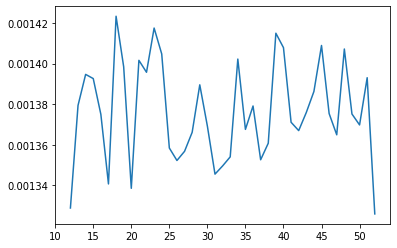

In [329]:
plt.plot(x, maelist)

In [34]:
dtreg(52)

0.0013414664042510325

#### Bagging Regressor

In [35]:
n_estimators = [50, 100, 200, 250, 300, 350]
random_state = 42

def bagref(nest, rstate):
    bagging = BaggingRegressor(n_estimators = nest, random_state=rstate)
    bagging.fit(x_train, y_train)
    ybag_pred = bagging.predict(x_test)
    mae = mean_absolute_error(y_test, ybag_pred)
    return mae

#maelist_bag = []
#for j in range(len(n_estimators)):
#    maelist_bag.append(bagref(n_estimators[j], random_state))

In [373]:
maelist_bag

[0.0008661665976369929,
 0.0008250715674601464,
 0.0008008917192192526,
 0.0007962315373414111,
 0.0007934702358174303,
 0.0007919891823039996]

In [36]:
print('Minimum MAE from bagging: ', bagref(350, 52)) # PowerTransform

Minimum MAE from bagging:  0.0007631052281091263
